<a href="https://colab.research.google.com/github/visualdatabase/fastdup/blob/main/examples/fastdup_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastdup Tutorial: Analyze Video

In [1]:
!pip install -U fastdup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download Meva dataset

### Meva dataset - Multi View Extended Video Dataset 
https://mevadata.org/resources/README-meva-kf1-data.html 

Note that we download a small subset as this data does not fit a Colab drive.

In [2]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [3]:
!aws configure # configure your s3 access using your credentials to download the dataset

AWS Access Key ID [****************NFNN]: 
AWS Secret Access Key [****************4nrU]: 
Default region name [None]: 
Default output format [None]: 


In [4]:



!aws s3 sync s3://mevadata-public-01/drop-4-hadcv22/2018-03-08 ./meva/ 

## Run Fastdup to gain insights from video

## Extract feature vectors from Video

Note: video extraction is slow on the free Colab notebook as only 1 core is used. It is recommended to run on a 32 core machine to speed up extraction.

In [1]:
!rm -fr video
# run fastdup to extract key frames from video. num_images=3 means we run on the first 3 videos.
!python -c "import fastdup; fastdup.run('meva', work_dir='video',verbose=0, run_mode=1)"

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
On Jupyter notebook running on large datasets, there may be delay getting the console output
A recommended way to fixing this is to run: 
%pip install wurlitzer
%load_ext wurlitzer

Going to loop over dir meva
Found total 23 videos to run on


## Build nearest neighbor model

In [2]:
import fastdup
fastdup.run('meva', work_dir='video', run_mode=2)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
On Jupyter notebook running on large datasets, there may be delay getting the console output
A recommended way to fixing this is to run: 
%pip install wurlitzer
%load_ext wurlitzer



0

## Visualize outliers

In [3]:
fastdup.create_outliers_gallery('video/outliers.csv', save_path='.', num_images=50)
                                

read outliers 345


100%|██████████| 50/50 [00:00<00:00, 6454.56it/s]


Stored outliers visual view in  ./outliers.html


0


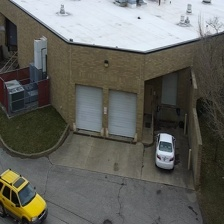
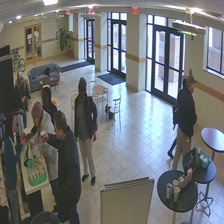
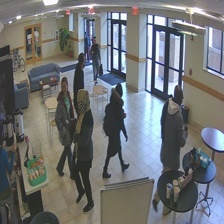
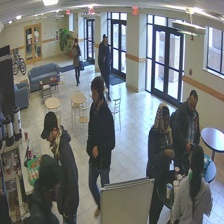
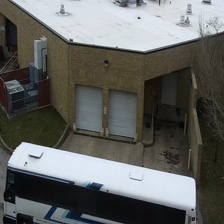
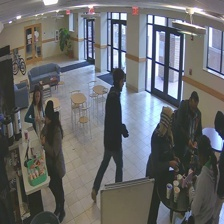
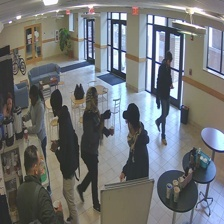
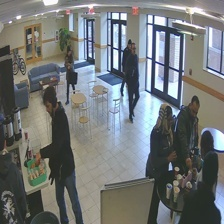
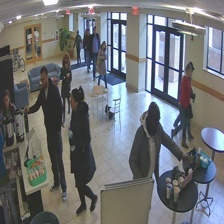
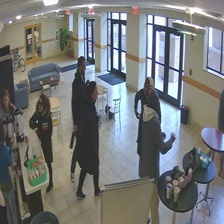
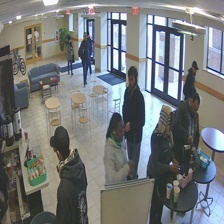
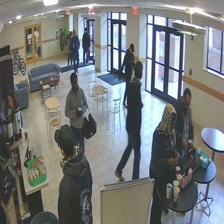
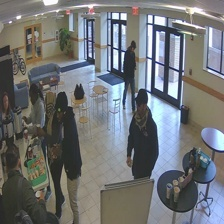
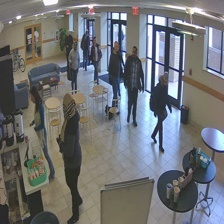
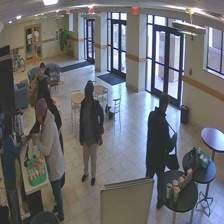
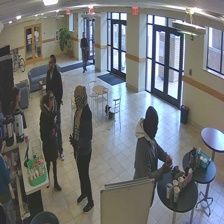
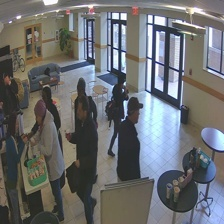
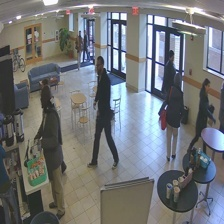
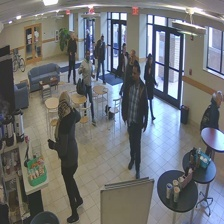
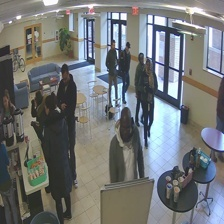
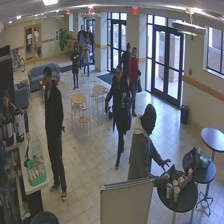
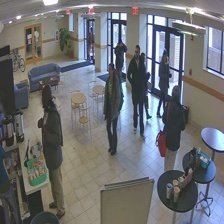
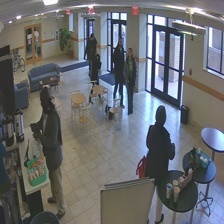
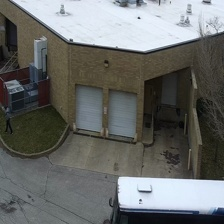
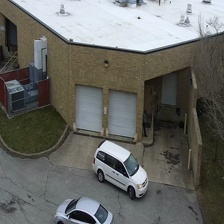
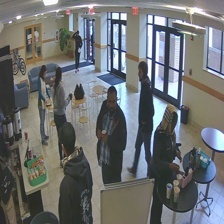
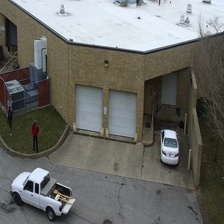
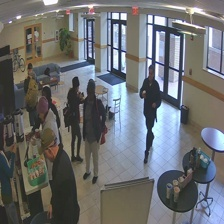
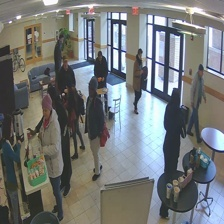
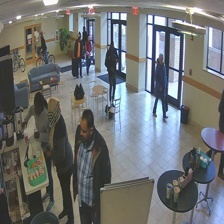
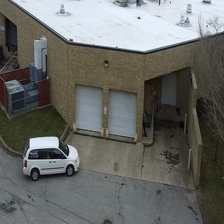
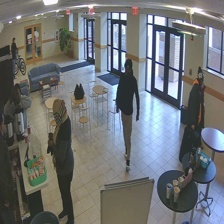
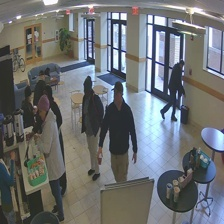
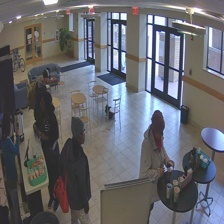
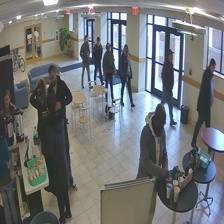
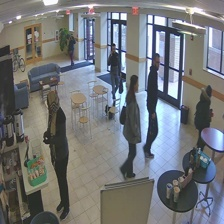
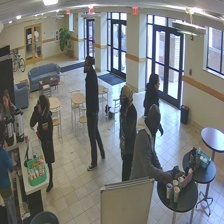
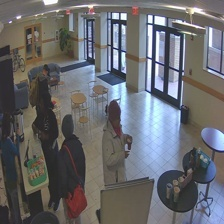
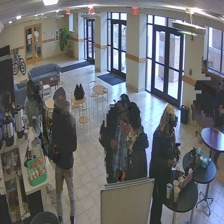
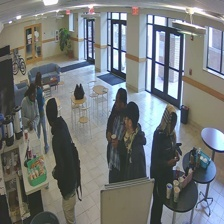
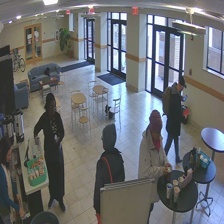
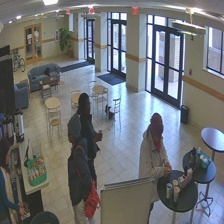
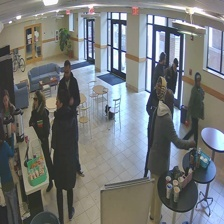
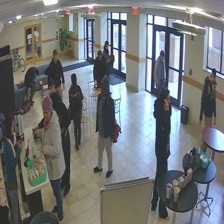
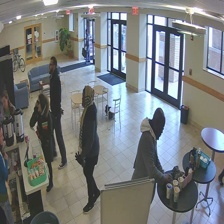
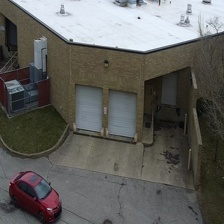
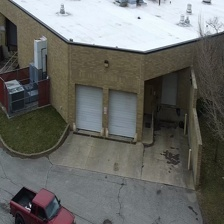
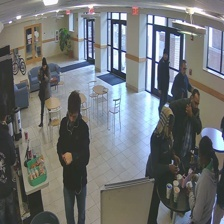
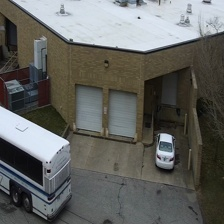
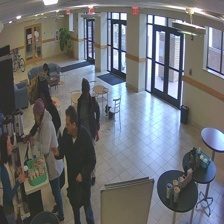

In [4]:
from IPython.display import HTML
HTML('outliers.html')

## Find similarities across different videos

In [5]:
fastdup.create_duplicate_videos_gallery('video', save_path='.',descending=False)

100%|██████████| 20/20 [00:00<00:00, 76.90it/s]


Stored similarity visual view in  ./similarity.html


0


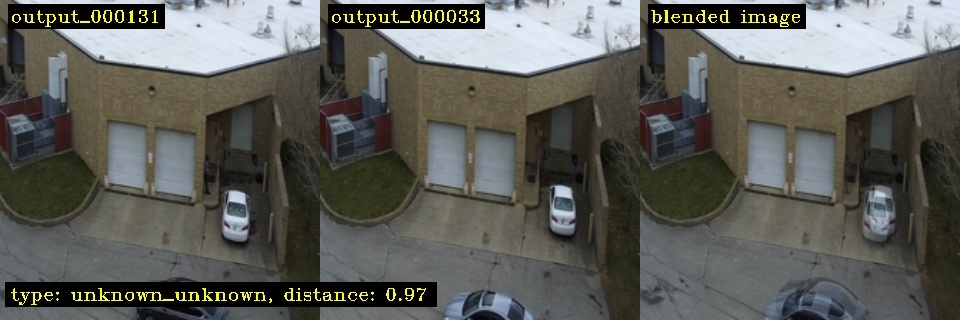
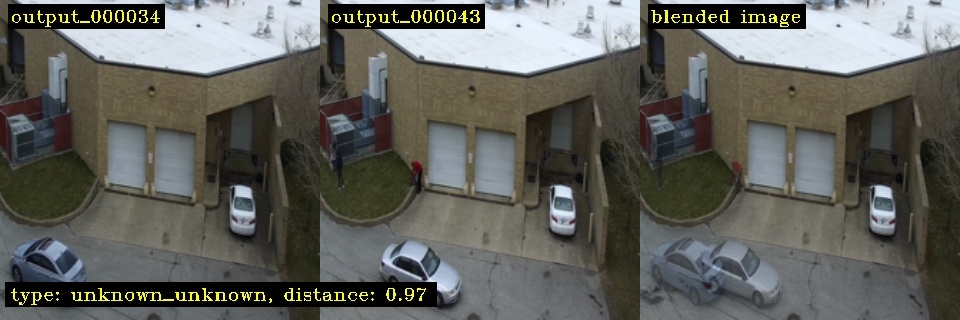
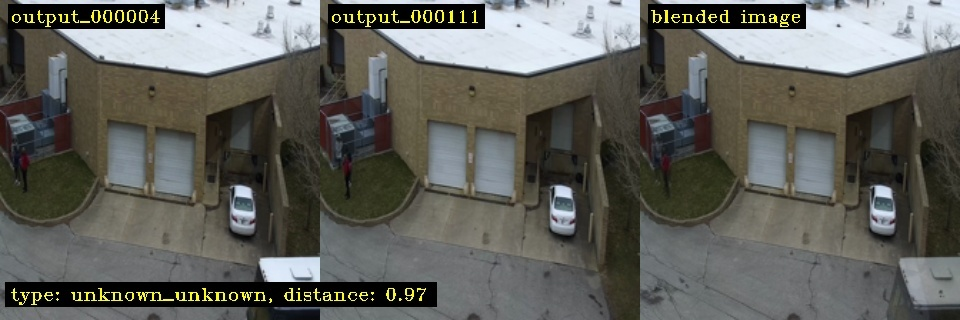
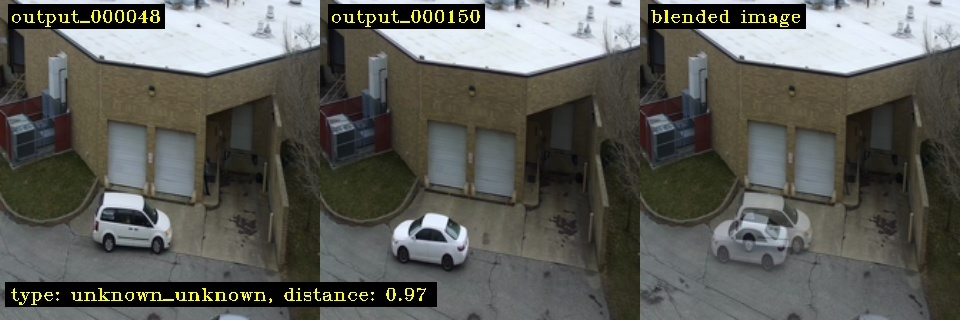
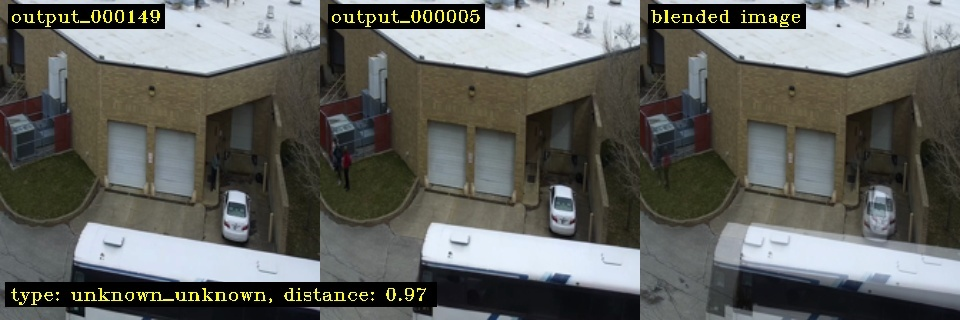
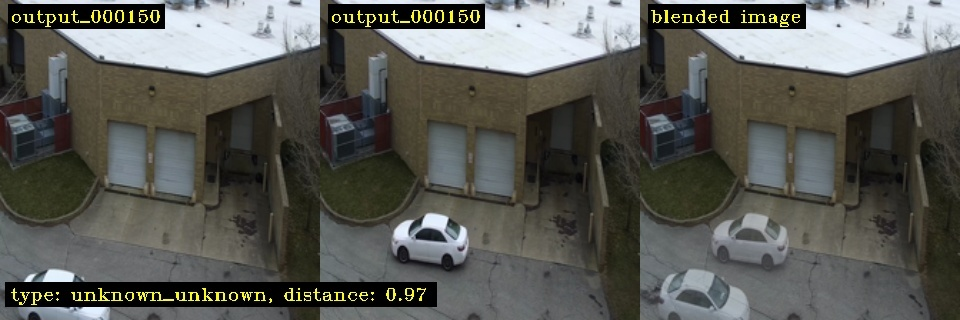
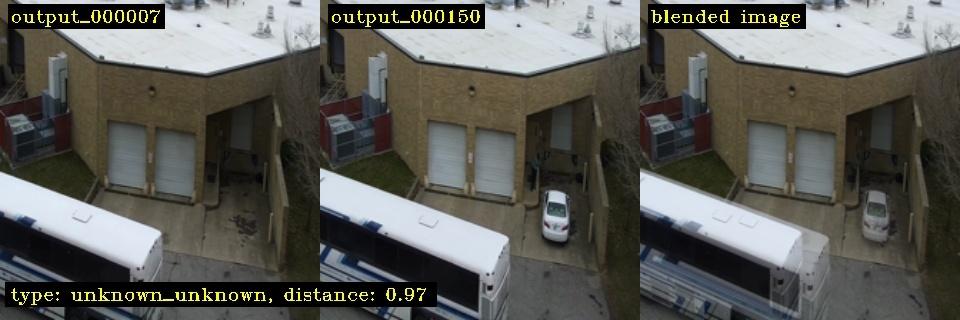
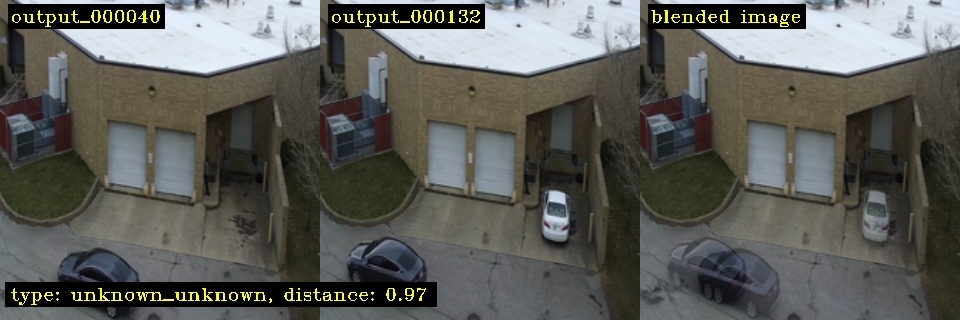
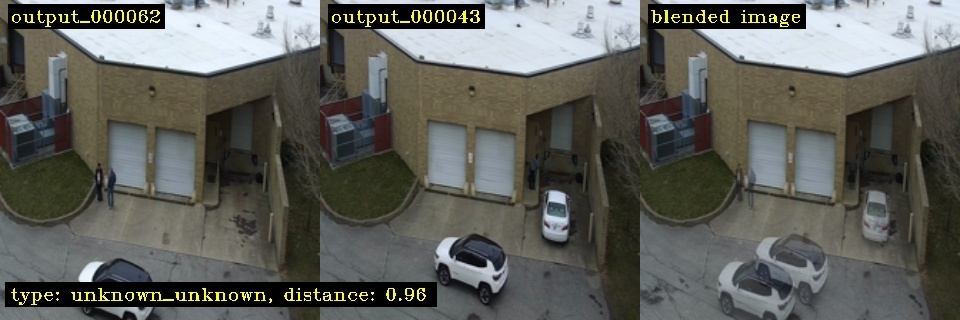
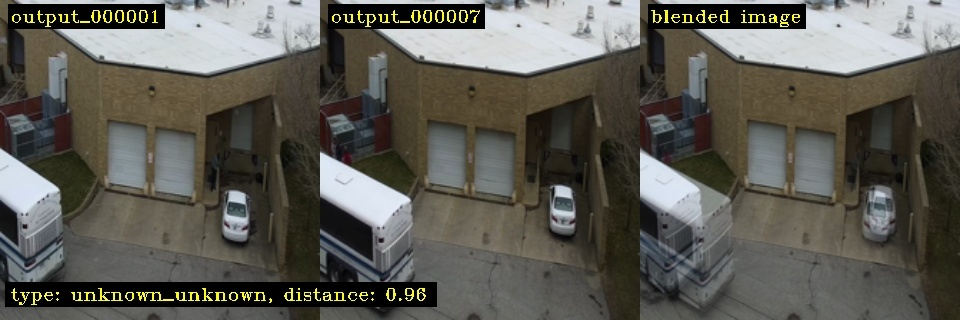
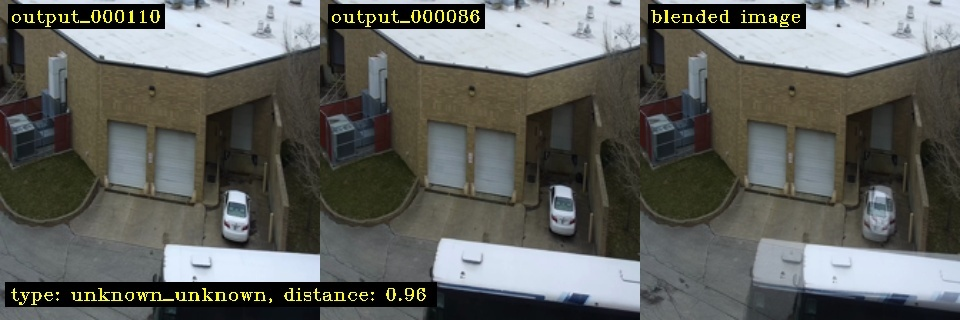
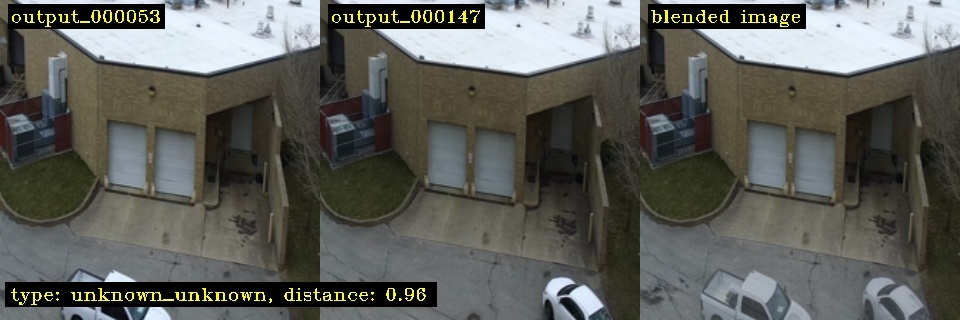
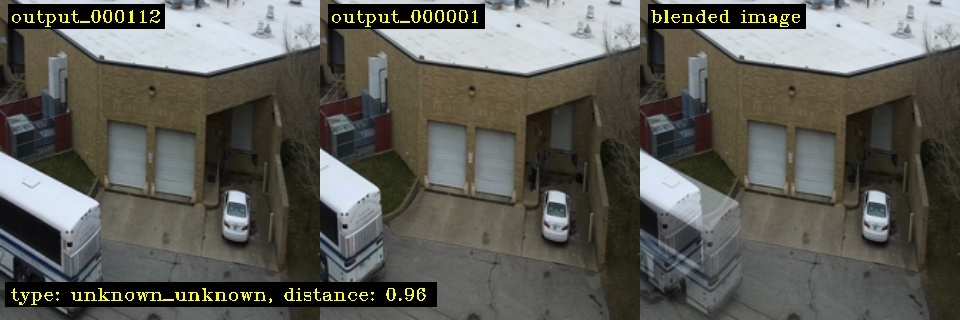
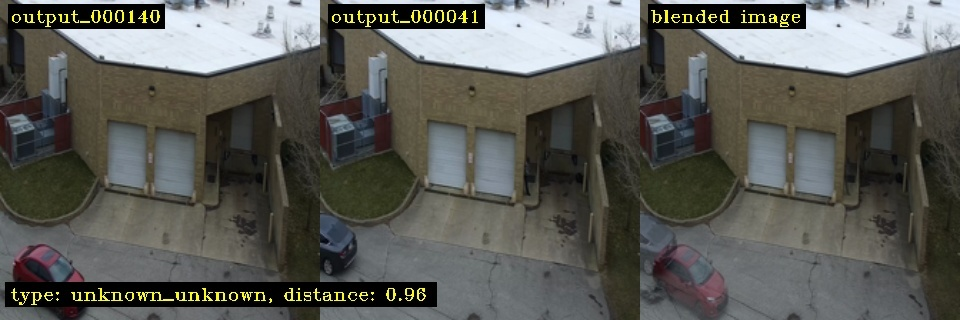
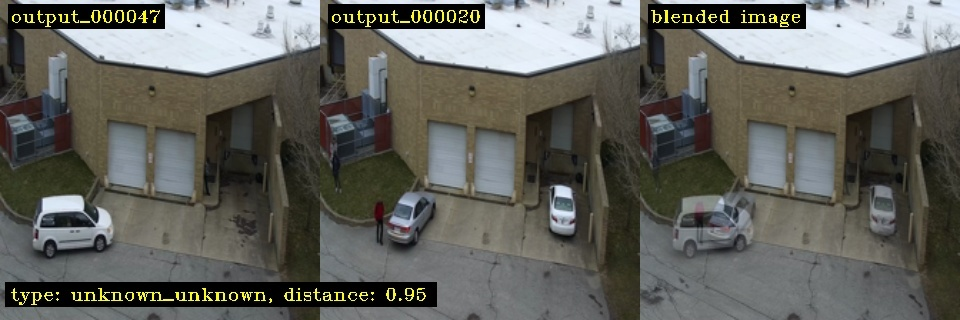
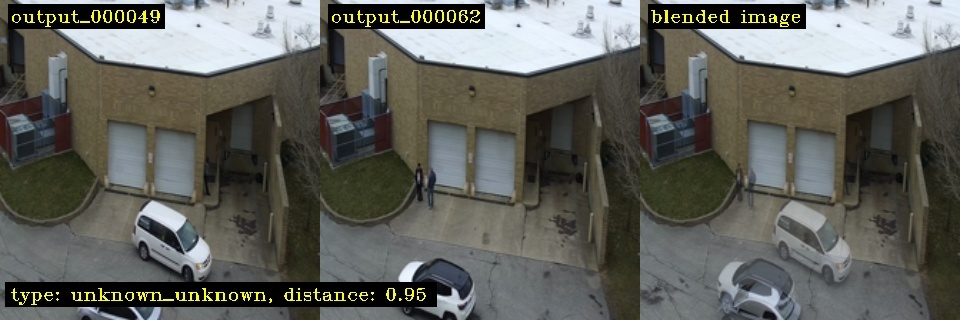
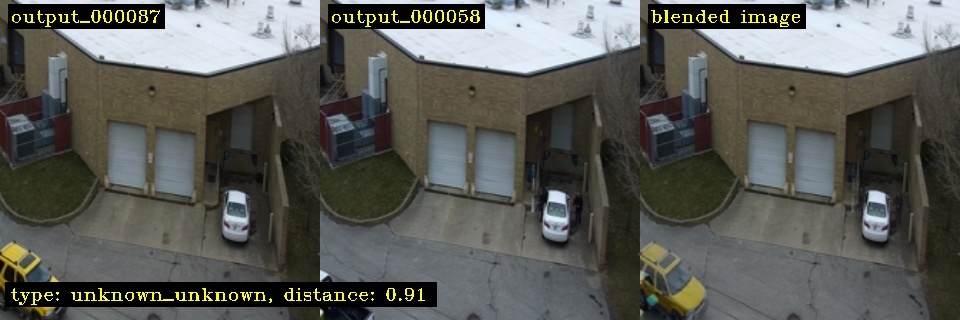

In [6]:
from IPython.display import HTML
HTML('similarity.html')